In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
df=pd.read_csv("flavors_of_cacao.csv")

def all_about_my_data(df):
    print("Here is some Basic Ground Info about your Data:\n")
    
    print("Number of Instances:",df.shape[0])
    print("Number of Features:",df.shape[1])
    
    print("\nSummary Stats:")
    print(df.describe())
    
    print("\nMissing Values:")
    print(df.isna().sum())

all_about_my_data(df)

Here is some Basic Ground Info about your Data:

Number of Instances: 1795
Number of Features: 9

Summary Stats:
               REF  Review\nDate       Rating
count  1795.000000   1795.000000  1795.000000
mean   1035.904735   2012.325348     3.185933
std     552.886365      2.927210     0.478062
min       5.000000   2006.000000     1.000000
25%     576.000000   2010.000000     2.875000
50%    1069.000000   2013.000000     3.250000
75%    1502.000000   2015.000000     3.500000
max    1952.000000   2017.000000     5.000000

Missing Values:
Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64


In [5]:
try :
    df["Review Date"].head()
except :
    print("An error occurred!")

An error occurred!


In [6]:
df.dtypes

Company \n(Maker-if known)            object
Specific Bean Origin\nor Bar Name     object
REF                                    int64
Review\nDate                           int64
Cocoa\nPercent                        object
Company\nLocation                     object
Rating                               float64
Bean\nType                            object
Broad Bean\nOrigin                    object
dtype: object

In [7]:
cols = list(df.columns)

def rec_features(feature_names):
    rec_feat = []
    for f in feature_names:
        rec_feat.append(((f.casefold()).replace("\n","_")).replace(" ","_"))
    return rec_feat

print("Feature Names before Cleaning:")
print(cols)
print("\nFeature Names after Cleaning:")
print(rec_features(cols))

Feature Names before Cleaning:
['Company\xa0\n(Maker-if known)', 'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType', 'Broad Bean\nOrigin']

Feature Names after Cleaning:
['company\xa0_(maker-if_known)', 'specific_bean_origin_or_bar_name', 'ref', 'review_date', 'cocoa_percent', 'company_location', 'rating', 'bean_type', 'broad_bean_origin']


In [8]:
new_feature_names = rec_features(cols)
new_feature_names[0] = "company"

df=df.rename(columns=dict(zip(df.columns,new_feature_names)))
df.dtypes

company                              object
specific_bean_origin_or_bar_name     object
ref                                   int64
review_date                           int64
cocoa_percent                        object
company_location                     object
rating                              float64
bean_type                            object
broad_bean_origin                    object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   company                           1795 non-null   object 
 1   specific_bean_origin_or_bar_name  1795 non-null   object 
 2   ref                               1795 non-null   int64  
 3   review_date                       1795 non-null   int64  
 4   cocoa_percent                     1795 non-null   object 
 5   company_location                  1795 non-null   object 
 6   rating                            1795 non-null   float64
 7   bean_type                         1794 non-null   object 
 8   broad_bean_origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [10]:
df[['bean_type', 'broad_bean_origin']].head()

,bean_type,broad_bean_origin
0,,Sao Tome
1,,Togo
2,,Togo
3,,Togo
4,,Peru


In [11]:
print(df['bean_type'].value_counts().head())
print("Missing Spaces encoded as:")
list(df['bean_type'][0:10])

                        887
Trinitario              419
Criollo                 153
Forastero                87
Forastero (Nacional)     52
Name: bean_type, dtype: int64
Missing Spaces encoded as:


['\xa0',
 '\xa0',
 '\xa0',
 '\xa0',
 '\xa0',
 'Criollo',
 '\xa0',
 'Criollo',
 'Criollo',
 '\xa0']

In [12]:
def repl_space(x):
    if(x is "\xa0"):
        return "None"
df['bean_type'] = df['bean_type'].apply(repl_space)
df.head()

<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
C:\Users\Baraa Ehab\AppData\Local\Temp\ipykernel_16192\3761331930.py:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if(x is "\xa0"):


,company,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,None,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,None,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,None,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,None,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,None,Peru


In [13]:
df['cocoa_percent']=df['cocoa_percent'].str.replace('%','').astype(float)/100
df.head()

,company,specific_bean_origin_or_bar_name,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,None,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,None,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,None,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,None,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,None,Peru


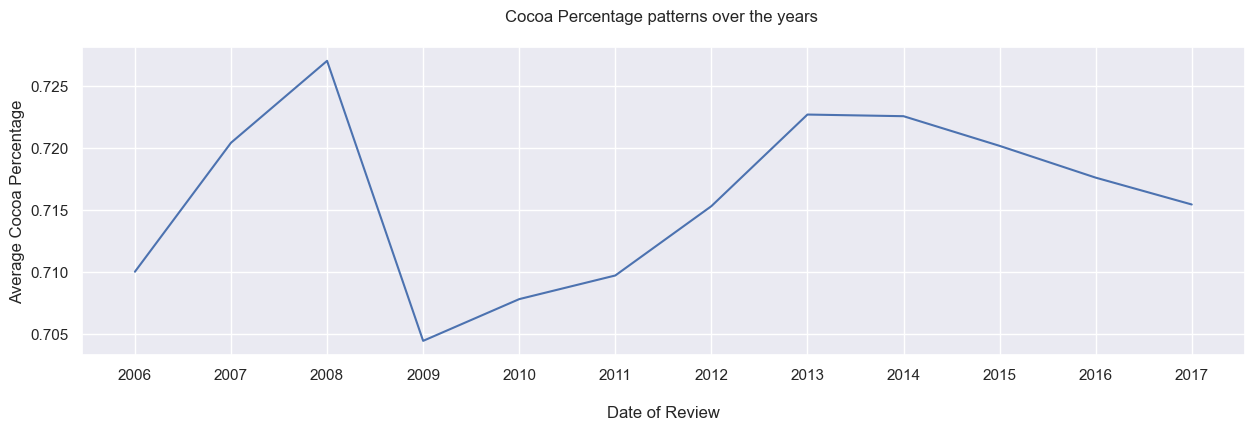

In [14]:
d5 = df.groupby('review_date').aggregate({'cocoa_percent':'mean'})
d5 = d5.reset_index()

sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='review_date', y='cocoa_percent', data=d5)
ax.set(xticks=d5.review_date.values)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Cocoa Percentage")
plt.title("Cocoa Percentage patterns over the years \n")
plt.show()

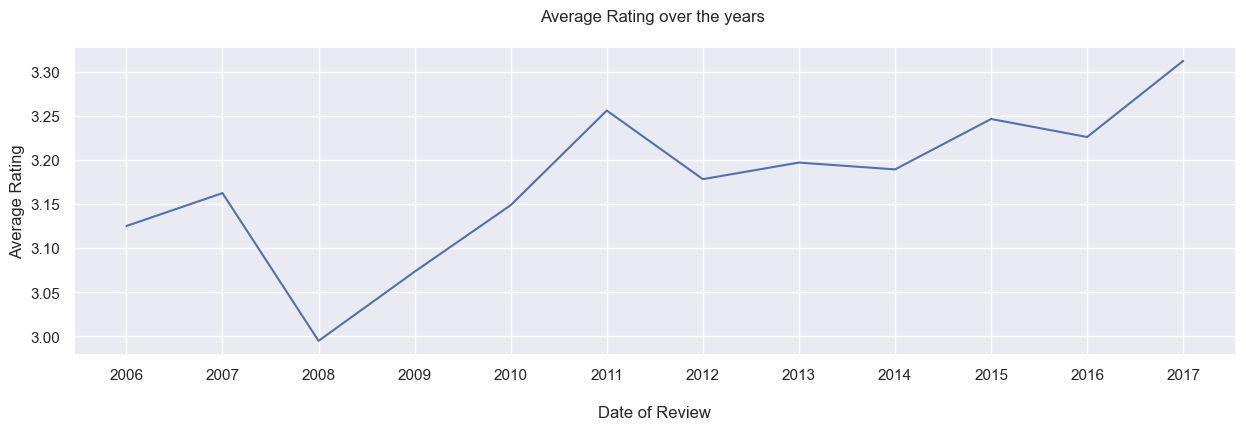

In [15]:
d6 = df.groupby('review_date').aggregate({'rating':'mean'})
d6 = d6.reset_index()

sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='review_date', y='rating', data=d6)
ax.set(xticks=d6.review_date.values)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Rating")
plt.title("Average Rating over the years \n")
plt.show()

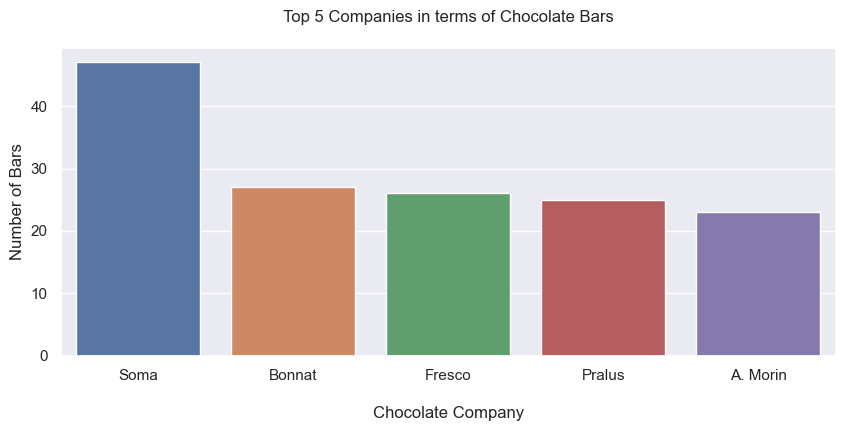

In [16]:
d = df['company'].value_counts().sort_values(ascending=False).head(5)
d = pd.DataFrame(d)
d = d.reset_index() 

sns.set()
plt.figure(figsize=(10,4))
sns.barplot(x='index', y='company', data=d)
plt.xlabel("\nChocolate Company")
plt.ylabel("Number of Bars")
plt.title("Top 5 Companies in terms of Chocolate Bars\n")
plt.show()

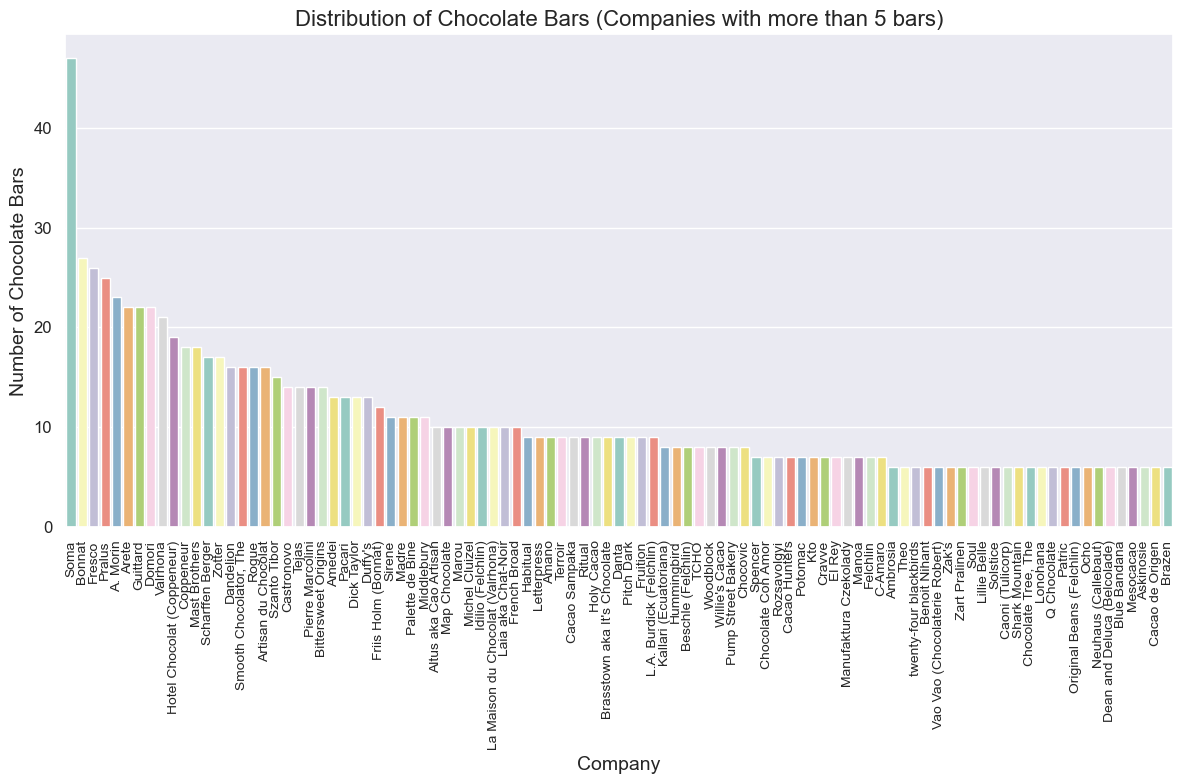

In [20]:
filtered_df = df[df['company'].isin(df['company'].value_counts()[df['company'].value_counts() > 5].index)]

plt.figure(figsize=(12, 8))
sns.countplot(x='company', data=filtered_df, order=filtered_df['company'].value_counts().index, palette='Set3')
plt.xlabel("Company", fontsize=14)
plt.ylabel("Number of Chocolate Bars", fontsize=14)
plt.title("Distribution of Chocolate Bars (Companies with more than 5 bars)", fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

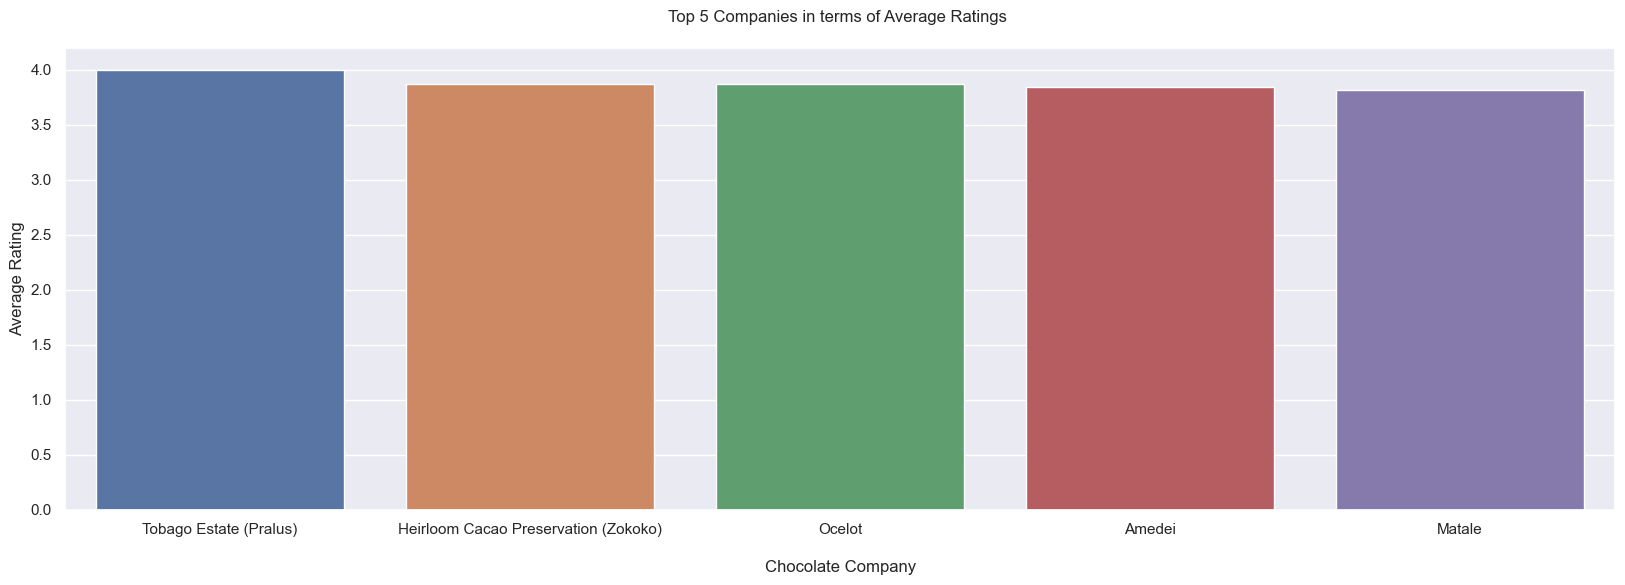

In [21]:
d2 = df.groupby('company').aggregate({'rating':'mean'})
d2 = d2.sort_values('rating', ascending=False).head(5)
d2 = d2.reset_index()

sns.set()
plt.figure(figsize=(20, 6))
sns.barplot(x='company', y='rating', data=d2)
plt.xlabel("\nChocolate Company")
plt.ylabel("Average Rating")
plt.title("Top 5 Companies in terms of Average Ratings \n")
plt.show()

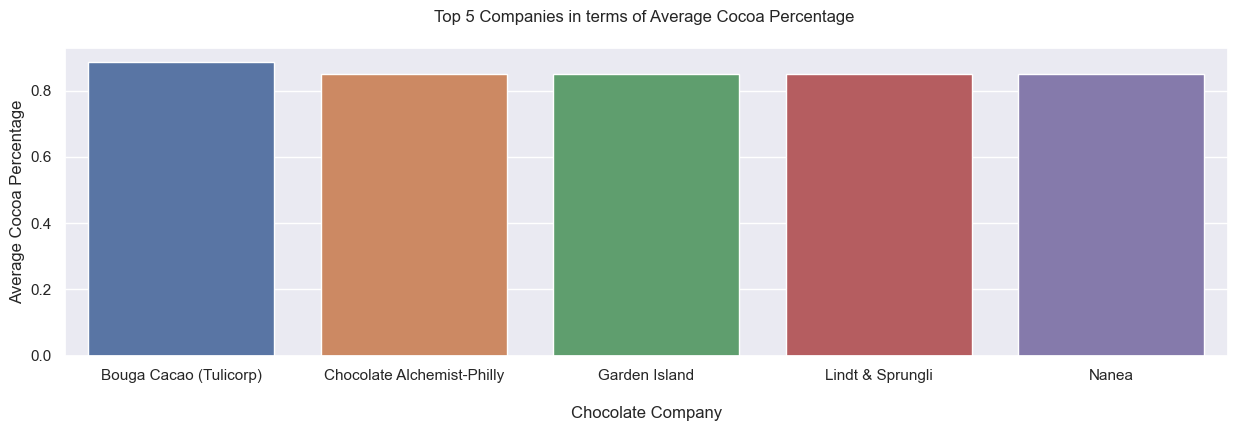

In [22]:
d2 = df.groupby('company').aggregate({'cocoa_percent':'mean'})
d2 = d2.sort_values('cocoa_percent', ascending=False).head(5)
d2 = d2.reset_index()

sns.set()
plt.figure(figsize=(15, 4))
sns.barplot(x='company', y='cocoa_percent', data=d2)
plt.xlabel("\nChocolate Company")
plt.ylabel("Average Cocoa Percentage")
plt.title("Top 5 Companies in terms of Average Cocoa Percentage \n")
plt.show()

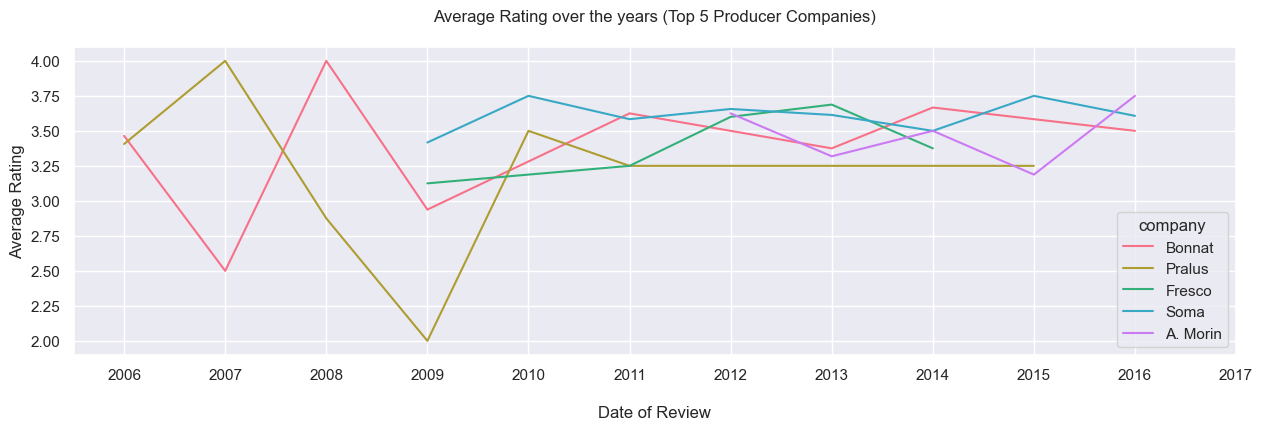

In [23]:
top5_dict = {}
for element in list(d['index']):
    temp = df[df['company']==element]
    top5_dict[element]=temp

top5_list = list(top5_dict.keys())

d7 = df.groupby(['review_date', 'company']).aggregate({'rating':'mean'})
d7 = d7.reset_index()
d7 = d7[d7['company'].isin(top5_list)]

sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='review_date', y='rating', hue="company", data=d7, palette="husl")
ax.set(xticks=d6.review_date.values)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Rating")
plt.title("Average Rating over the years (Top 5 Producer Companies)\n")
plt.show()

In [24]:
soma = df[df['company']=='Soma']

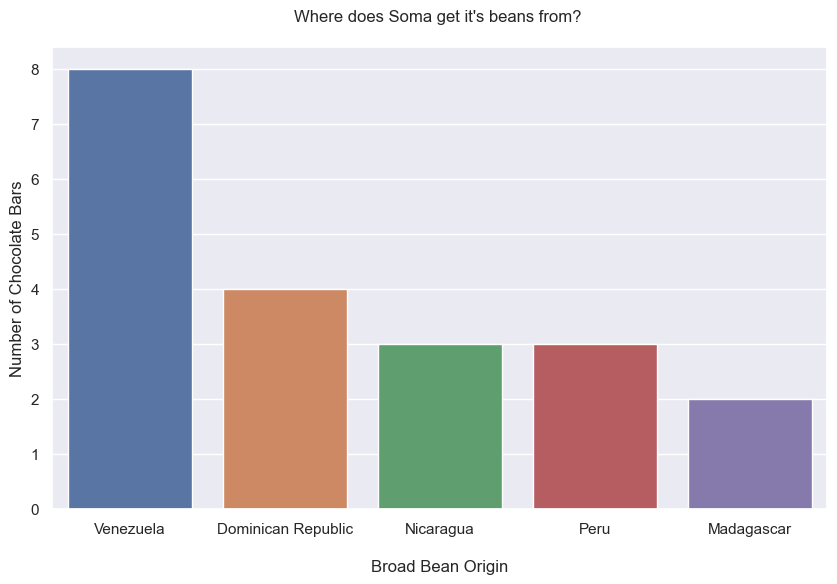

In [25]:
d3 = soma['broad_bean_origin'].value_counts().sort_values(ascending=False).head(5)
d3 = pd.DataFrame(d3)
d3 = d3.reset_index()

sns.set()
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='broad_bean_origin', data=d3)
plt.xlabel("\nBroad Bean Origin")
plt.ylabel("Number of Chocolate Bars")
plt.title("Where does Soma get it's beans from? \n")
plt.show()

C:\Users\Baraa Ehab\AppData\Local\Temp\ipykernel_16192\1465505322.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(soma['rating'], legend=False, color="brown", shade=True)


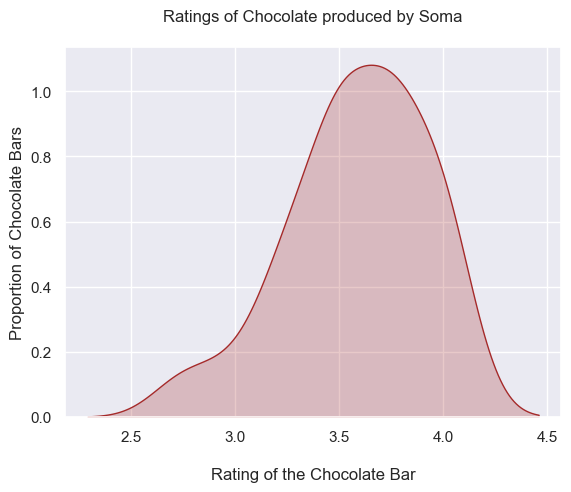

In [26]:
sns.kdeplot(soma['rating'], legend=False, color="brown", shade=True)
plt.xlabel("\nRating of the Chocolate Bar")
plt.ylabel("Proportion of Chocolate Bars")
plt.title("Ratings of Chocolate produced by Soma\n")
plt.show()

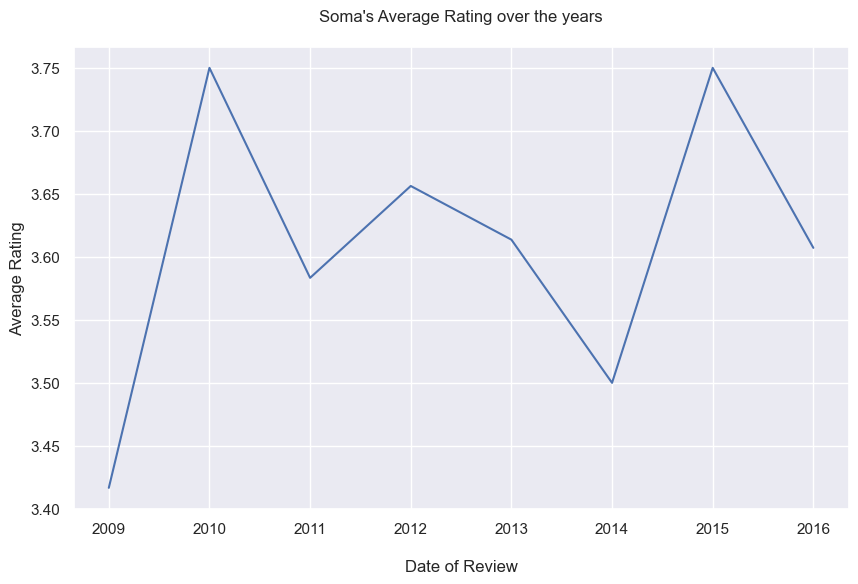

In [27]:
d4 = soma.groupby('review_date').aggregate({'rating':'mean'})
d4 = d4.reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='review_date', y='rating', data=d4)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Rating")
plt.title("Soma's Average Rating over the years\n")
plt.show()

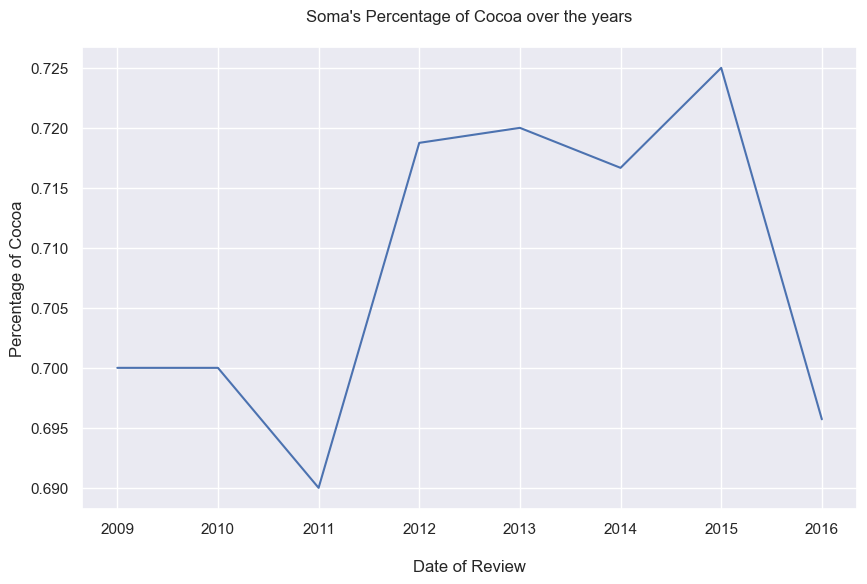

In [28]:
d4 = soma.groupby('review_date').aggregate({'cocoa_percent':'mean'})
d4 = d4.reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='review_date', y='cocoa_percent', data=d4)
plt.xlabel("\nDate of Review")
plt.ylabel("Percentage of Cocoa")
plt.title("Soma's Percentage of Cocoa over the years\n")
plt.show()

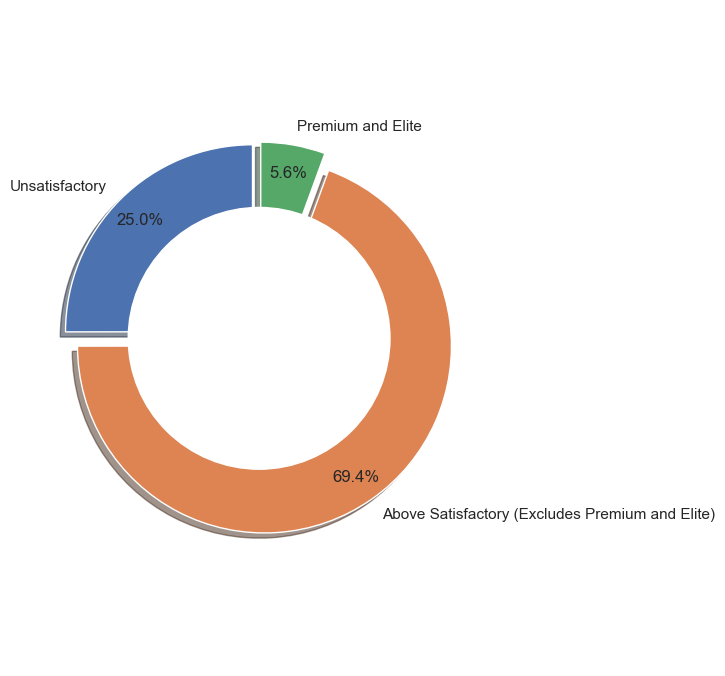

In [29]:
unsatisfactory = df[df['rating'] < 3.0]
satisfactory = df[(df['rating'] >= 3.0) & (df.rating < 4)]
pre_elite = df[df['rating'] >= 4.0]
label_names=['Unsatisfactory','Above Satisfactory (Excludes Premium and Elite)','Premium and Elite']
sizes = [unsatisfactory.shape[0],satisfactory.shape[0],pre_elite.shape[0]]

explode = (0.05,0.05,0.05)
my_circle=plt.Circle((0,0),0.7,color='white')
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=label_names,explode=explode,autopct='%1.1f%%',pctdistance=0.85,startangle=90,shadow=True)
fig=plt.gcf()
fig.gca().add_artist(my_circle)
plt.axis('equal')
plt.tight_layout()
plt.show()

Rating: 3.5 Reviews: 392
Rating: 3.0 Reviews: 341
Rating: 3.25 Reviews: 303
Rating: 2.75 Reviews: 259
Rating: 3.75 Reviews: 210
Rating: 2.5 Reviews: 127
Rating: 4.0 Reviews: 98
Rating: 2.0 Reviews: 32
Rating: 2.25 Reviews: 14
Rating: 1.5 Reviews: 10
Rating: 1.0 Reviews: 4
Rating: 1.75 Reviews: 3
Rating: 5.0 Reviews: 2


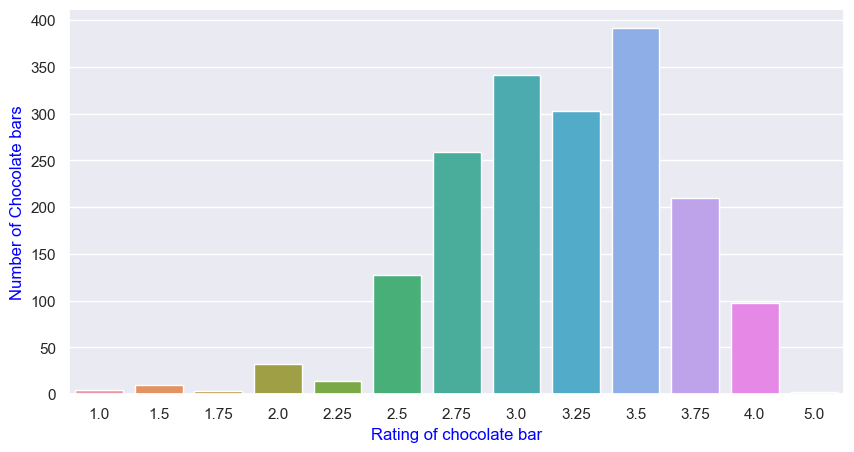

In [30]:
r=list(df['rating'].value_counts())
rating=df['rating'].value_counts().index.tolist()
rat=dict(zip(rating,r))
for key,val in rat.items():
    print ('Rating:',key,'Reviews:',val)
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)
plt.xlabel('Rating of chocolate bar',size=12,color='blue')
plt.ylabel('Number of Chocolate bars',size=12,color='blue')
plt.show()

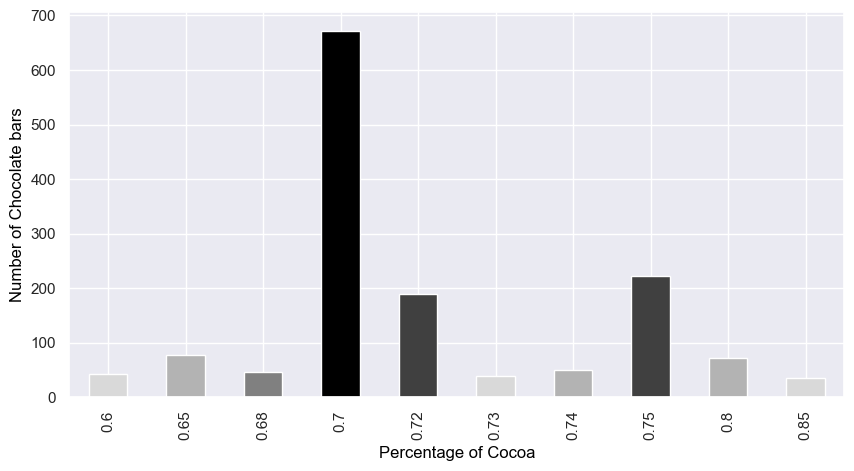

In [31]:
plt.figure(figsize=(10,5))
df['cocoa_percent'].value_counts().head(10).sort_index().plot.bar(color=['#d9d9d9','#b3b3b3','#808080','#000000','#404040','#d9d9d9','#b3b3b3','#404040','#b3b3b3'])
plt.xlabel('Percentage of Cocoa',size=12,color='black')
plt.ylabel('Number of Chocolate bars',size=12,color='black')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


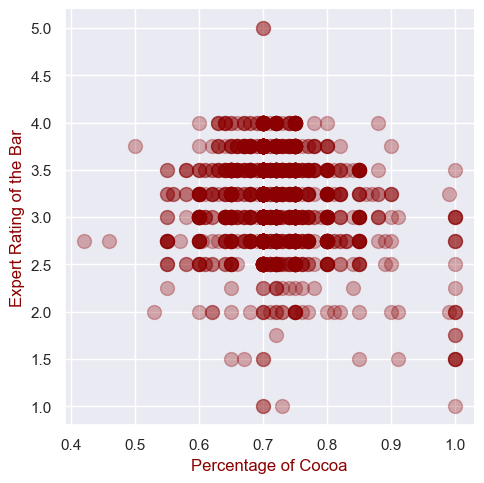

In [32]:
sns.lmplot(x='cocoa_percent',y='rating',fit_reg=False,scatter_kws={"color":"darkred","alpha":0.3,"s":100},data=df)
plt.xlabel('Percentage of Cocoa',size=12,color='darkred')
plt.ylabel('Expert Rating of the Bar',size=12,color='darkred')
plt.show()

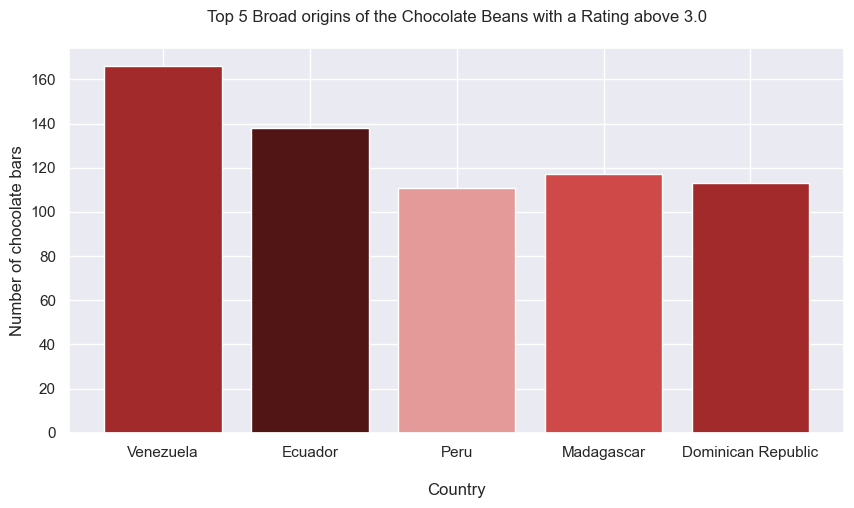

{'Venezuela': 166, 'Ecuador': 138, 'Peru': 111, 'Madagascar': 117, 'Dominican Republic': 113}


In [33]:
countries=df['broad_bean_origin'].value_counts().index.tolist()[:5]

satisfactory={} 
for j in countries:
    c=0
    b=df[df['broad_bean_origin']==j]
    br=b[b['rating']>=3]
    for i in br['rating']:
        c+=1
        satisfactory[j]=c    

li=satisfactory.keys()
plt.figure(figsize=(10,5))
plt.bar(range(len(satisfactory)), satisfactory.values(), align='center',color=['#a22a2a','#511515','#e59a9a','#d04949','#a22a2a'])
plt.xticks(range(len(satisfactory)), list(li))
plt.xlabel('\nCountry')
plt.ylabel('Number of chocolate bars')
plt.title("Top 5 Broad origins of the Chocolate Beans with a Rating above 3.0\n")
plt.show()

print(satisfactory)

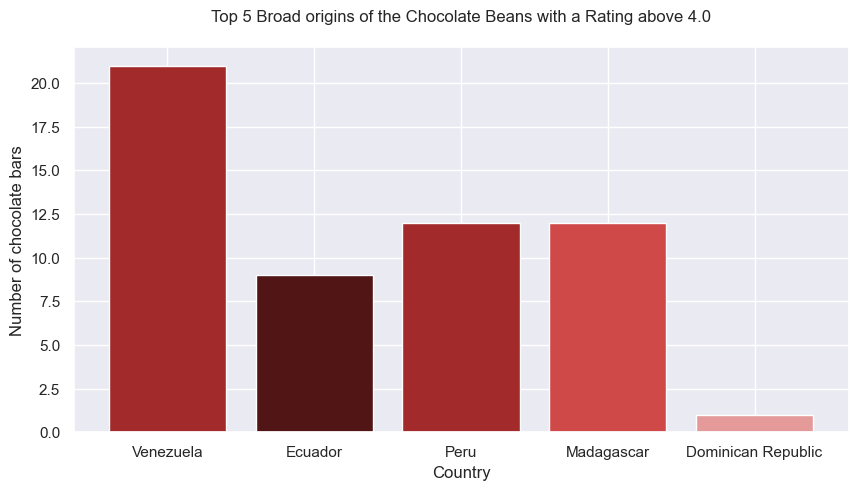

{'Venezuela': 21, 'Ecuador': 9, 'Peru': 12, 'Madagascar': 12, 'Dominican Republic': 1}


In [34]:
countries=df['broad_bean_origin'].value_counts().index.tolist()[:5]

best_choc={} 
for j in countries:
    c=0
    b=df[df['broad_bean_origin']==j]
    br=b[b['rating']>=4] 
    for i in br['rating']:
        c+=1
        best_choc[j]=c 

li=best_choc.keys()
plt.figure(figsize=(10,5))
plt.bar(range(len(best_choc)), best_choc.values(), align='center',color=['#a22a2a','#511515','#a22a2a','#d04949','#e59a9a'])
plt.xticks(range(len(best_choc)), list(li))
plt.xlabel('Country')
plt.ylabel('Number of chocolate bars')
plt.title("Top 5 Broad origins of the Chocolate Beans with a Rating above 4.0\n")
plt.show()

print(best_choc)

Top Chocolate Producing Countries in the World

U.S.A.    764
France    156
Canada    125
U.K.       96
Italy      63
Name: company_location, dtype: int64


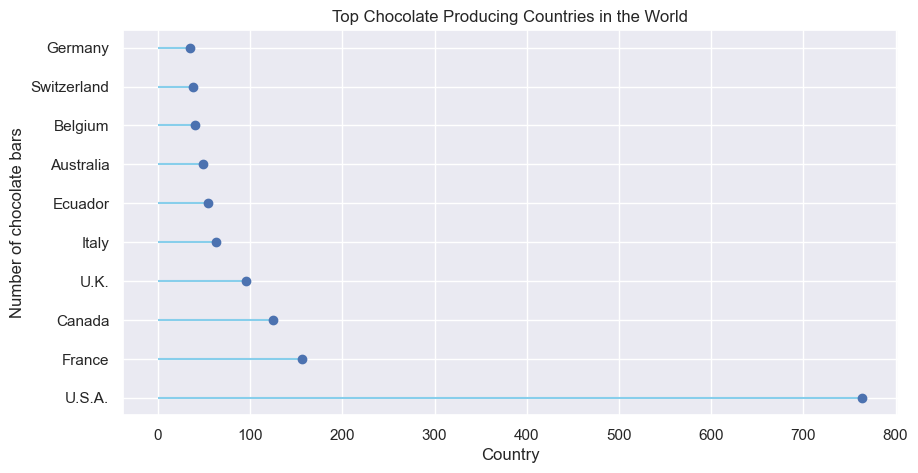

In [35]:
print ('Top Chocolate Producing Countries in the World\n')
country=list(df['company_location'].value_counts().head(10).index)
choco_bars=list(df['company_location'].value_counts().head(10))
prod_ctry=dict(zip(country,choco_bars))
print(df['company_location'].value_counts().head())

plt.figure(figsize=(10,5))
plt.hlines(y=country,xmin=0,xmax=choco_bars,color='skyblue')
plt.plot(choco_bars,country,"o")
plt.xlabel('Country')
plt.ylabel('Number of chocolate bars')
plt.title("Top Chocolate Producing Countries in the World")
plt.show()

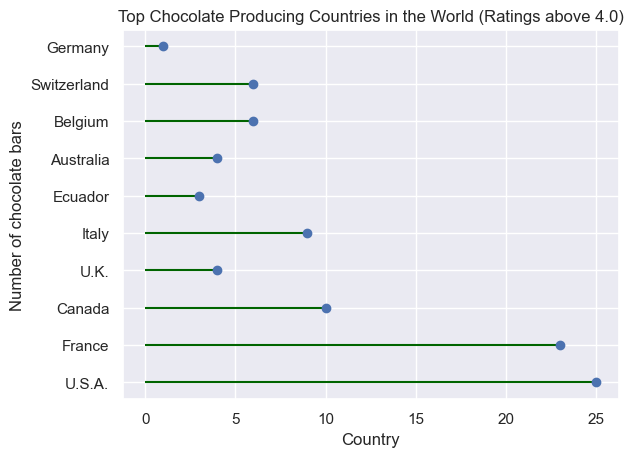

{'U.S.A.': 25, 'France': 23, 'Canada': 10, 'U.K.': 4, 'Italy': 9, 'Ecuador': 3, 'Australia': 4, 'Belgium': 6, 'Switzerland': 6, 'Germany': 1}


In [36]:
countries=country
best_choc={} 
for j in countries:
    c=0
    b=df[df['company_location']==j]
    br=b[b['rating']>=4] 
    for i in br['rating']:
        c+=1
        best_choc[j]=c    

li=best_choc.keys()

plt.hlines(y=li,xmin=0,xmax=best_choc.values(),color='darkgreen')
plt.plot(best_choc.values(),li,"o")
plt.xlabel('Country')
plt.ylabel('Number of chocolate bars')
plt.title("Top Chocolate Producing Countries in the World (Ratings above 4.0)")
plt.show()
print(best_choc)